In [19]:
# 群组分析不同组别的用户留存情况
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# 导入数据
df = pd.read_csv('2019-Dec.csv')

In [22]:
# 数据探索
df.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

In [23]:
df.shape

(3533286, 9)

In [24]:
df.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    3474821
brand            1510289
price                  0
user_id                0
user_session         779
dtype: int64

In [25]:
# 数据清洗
# 筛选价格大于0的行记录
df1 = df.query('price > 0').drop_duplicates()
df1

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5
...,...,...,...,...,...,...,...,...,...
3533281,2019-12-31 23:59:39 UTC,view,5683350,1487580005671109489,NaN,masura,2.84,536812729,e4a2d47c-a956-4c46-8176-745f52ea664b
3533282,2019-12-31 23:59:46 UTC,view,5888097,1487580013388628160,NaN,shik,179.05,503658154,2dde9867-9e71-4a64-880d-aa68b66aae6d
3533283,2019-12-31 23:59:51 UTC,view,59975,1487580012096782476,NaN,NaN,7.14,595414541,4c6d80bb-5dd3-4fbb-b592-187b51db2753
3533284,2019-12-31 23:59:52 UTC,view,5775982,1783999063314661546,NaN,NaN,11.90,397780878,7e8a2b85-153a-44eb-a71f-b748fde14fcc


In [28]:
# 数据处理
# 1.获取event_time中的时间：年月日
def get_time(datetime):
    event_time = datetime.strip(' UTC')
    event_time = dt.datetime.fromisoformat(event_time)
    y = dt.date(event_time.year, event_time.month, event_time.day)
    return y

In [29]:
df1['event_day'] = df1['event_time'].apply(get_time)
df1

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_day
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,2019-12-01
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,2019-12-01
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,2019-12-01
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,2019-12-01
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,2019-12-01
...,...,...,...,...,...,...,...,...,...,...
3533281,2019-12-31 23:59:39 UTC,view,5683350,1487580005671109489,NaN,masura,2.84,536812729,e4a2d47c-a956-4c46-8176-745f52ea664b,2019-12-31
3533282,2019-12-31 23:59:46 UTC,view,5888097,1487580013388628160,NaN,shik,179.05,503658154,2dde9867-9e71-4a64-880d-aa68b66aae6d,2019-12-31
3533283,2019-12-31 23:59:51 UTC,view,59975,1487580012096782476,NaN,NaN,7.14,595414541,4c6d80bb-5dd3-4fbb-b592-187b51db2753,2019-12-31
3533284,2019-12-31 23:59:52 UTC,view,5775982,1783999063314661546,NaN,NaN,11.90,397780878,7e8a2b85-153a-44eb-a71f-b748fde14fcc,2019-12-31


In [30]:
# 2.根据每个用户的user_id来确定最早登陆时间
grouping = df1.groupby('user_id')['event_day']
grouping

In [32]:
df1['min_day'] = grouping.transform('min')
df1.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_day,min_day
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,2019-12-01,2019-12-01
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,2019-12-01,2019-12-01
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,2019-12-01,2019-12-01
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,2019-12-01,2019-12-01
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,2019-12-01,2019-12-01


In [33]:
# 3.计算访问日event_day和最早访问时间的间隔
# 3为假定的用户分组访问周期
df1['day_gap'] = (((df1['event_day'] - df1['min_day']) // 3) + dt.timedelta(days=1)).apply(lambda x:x.days)
df1

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_day,min_day,day_gap
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,2019-12-01,2019-12-01,1
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,2019-12-01,2019-12-01,1
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,2019-12-01,2019-12-01,1
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,2019-12-01,2019-12-01,1
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,2019-12-01,2019-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3533281,2019-12-31 23:59:39 UTC,view,5683350,1487580005671109489,NaN,masura,2.84,536812729,e4a2d47c-a956-4c46-8176-745f52ea664b,2019-12-31,2019-12-01,11
3533282,2019-12-31 23:59:46 UTC,view,5888097,1487580013388628160,NaN,shik,179.05,503658154,2dde9867-9e71-4a64-880d-aa68b66aae6d,2019-12-31,2019-12-31,1
3533283,2019-12-31 23:59:51 UTC,view,59975,1487580012096782476,NaN,NaN,7.14,595414541,4c6d80bb-5dd3-4fbb-b592-187b51db2753,2019-12-31,2019-12-31,1
3533284,2019-12-31 23:59:52 UTC,view,5775982,1783999063314661546,NaN,NaN,11.90,397780878,7e8a2b85-153a-44eb-a71f-b748fde14fcc,2019-12-31,2019-12-11,7


In [36]:
# 4.按照首次访问时间和时间间隔来统计用户数
grouping1 = df1.groupby(['min_day', 'day_gap'])
# 根据用户user_id去重统计每个组的用户数
grouping1['user_id'].apply(pd.Series.nunique)  # 展示去重的总个数
grouping1['user_id'].apply(pd.Series.unique)   # 展示去重之后的具体元素
df2 = grouping1['user_id'].apply(pd.Series.nunique).reset_index()
df2.head()

,min_day,day_gap,user_id
0,2019-12-01,1,17519
1,2019-12-01,2,2591
2,2019-12-01,3,2276
3,2019-12-01,4,2039
4,2019-12-01,5,1749


In [37]:
# 5.生成数据透视表
df3 = df2.pivot(index='min_day', columns='day_gap', values='user_id')
df3.head()

day_gap,1,2,3,4,5,6,7,8,9,10,11
min_day,,,,,,,,,,,
2019-12-01,17519.0,2591.0,2276.0,2039.0,1749.0,1623.0,1410.0,1314.0,1110.0,994.0,255.0
2019-12-02,17044.0,2006.0,1759.0,1578.0,1330.0,1333.0,937.0,1062.0,809.0,586.0,NaN
2019-12-03,15240.0,1346.0,1439.0,1080.0,1024.0,937.0,729.0,709.0,490.0,287.0,NaN
2019-12-04,14745.0,1265.0,1226.0,829.0,930.0,686.0,660.0,522.0,417.0,94.0,NaN
2019-12-05,13725.0,1154.0,979.0,745.0,671.0,541.0,574.0,409.0,323.0,NaN,NaN


In [38]:
# 6.改变数据形式：方便最终使用百分比显示数据
size = df3.iloc[:,0]
table = df3.divide(size, axis=0)  # 在行方向上除以对应size的值
table.head()

day_gap,1,2,3,4,5,6,7,8,9,10,11
min_day,,,,,,,,,,,
2019-12-01,1.0,0.147897,0.129916,0.116388,0.099834,0.092642,0.080484,0.075004,0.063360,0.056738,0.014556
2019-12-02,1.0,0.117695,0.103203,0.092584,0.078033,0.078209,0.054975,0.062309,0.047465,0.034382,NaN
2019-12-03,1.0,0.088320,0.094423,0.070866,0.067192,0.061483,0.047835,0.046522,0.032152,0.018832,NaN
2019-12-04,1.0,0.085792,0.083147,0.056222,0.063072,0.046524,0.044761,0.035402,0.028281,0.006375,NaN
2019-12-05,1.0,0.084080,0.071330,0.054281,0.048889,0.039417,0.041821,0.029800,0.023534,NaN,NaN


In [44]:
# 保留3位小数，同时改变table索引值
table.round(3) * 100

day_gap,1,2,3,4,5,6,7,8,9,10,11
2019-12-01,100.0,14.8,13.0,11.6,10.0,9.3,8.0,7.5,6.3,5.7,1.5
2019-12-02,100.0,11.8,10.3,9.3,7.8,7.8,5.5,6.2,4.7,3.4,NaN
2019-12-03,100.0,8.8,9.4,7.1,6.7,6.1,4.8,4.7,3.2,1.9,NaN
2019-12-04,100.0,8.6,8.3,5.6,6.3,4.7,4.5,3.5,2.8,0.6,NaN
2019-12-05,100.0,8.4,7.1,5.4,4.9,3.9,4.2,3.0,2.4,NaN,NaN
2019-12-06,100.0,8.9,6.3,6.2,4.9,4.1,3.9,2.8,1.4,NaN,NaN
2019-12-07,100.0,7.6,6.2,5.3,4.4,4.0,3.2,2.5,0.5,NaN,NaN
2019-12-08,100.0,7.7,6.1,4.9,3.7,3.4,3.0,2.0,NaN,NaN,NaN
2019-12-09,100.0,7.5,6.0,5.1,4.3,3.7,2.7,1.3,NaN,NaN,NaN
2019-12-10,100.0,6.8,6.2,4.6,4.3,3.6,2.3,0.4,NaN,NaN,NaN


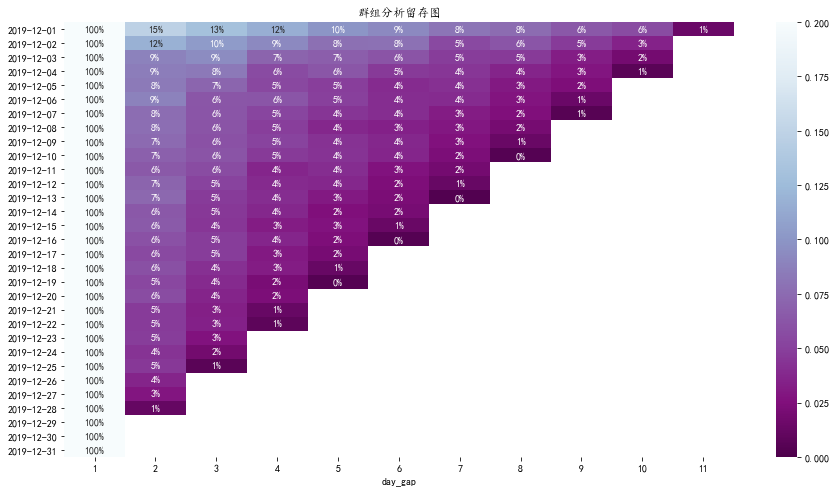

In [51]:
# 群组分析绘图
# 设置汉字格式，解决中文无法显示问题
plt.rcParams['font.family'] = ['Kaiti']
# 解决保存图像中负号'-'显示为方块问题
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15, 8))
plt.title('群组分析留存图')

_ = sns.heatmap(data = table, annot=True, fmt='.0%', vmin=0.0, vmax=0.2, cmap='BuPu_r')
plt.show()